<div style="background-color: blue";>
<h1 style="text-align: center;color: white;"> Abdullah Abdelhakeem </h1>
<h2 style="text-align: center;color: white;"> Spark Streaming and GraphFrame </h2>
<h3 style="text-align: center;color: white;"> Windows Not Linux </h3>
 </div>   

<h1 style="text-align: center;color: green;">AI PRO INTAKE_1 @ ITI </h3>

# Task 1

## Our first streaming using rate source


### Initialization SparkSession

In [1]:
import os
os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk1.8.0_291"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [2]:
import findspark
findspark.init()
import pyspark

In [16]:
# from graphframes import *
# spark = SparkSession.builder.appName('graphframes').getOrCreate()
# sc = spark.sparkContext
# sqlContext = SQLContext(sc)

### Let’s first import the required libraries.

*   Pyspark functions 
*   Pyspark Types



In [17]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [18]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Streaming").getOrCreate()

### Create streaming DataFrame


Let’s create our first Spark Streaming DataFrame using rate source. Here we have specified the format as rate and specified rowsPerSecond = 1 to generate 1 row for each micro-batch and load the data into initDF streaming DataFrame. 

In [19]:
initDF = spark.readStream.format("rate") \
    .option("rowsPerSecond",1)\
    .option("truncate",False)\
    .load()

### Check if DataFrame is streaming or Not.


In [20]:
initDF.isStreaming

### Transformation

Perform transformation on initDF to generate another column result by just adding 1 to column value :


In [21]:
column_generation = initDF.withColumn("column value",col('value') + lit(1))

### Output Use append output mode to output only newly generated data and format as console to print the result on the console.

In [22]:
query = column_generation.writeStream.outputMode("append") \
    .format("console") \
    .start().awaitTermination()

In [23]:
query.stop()

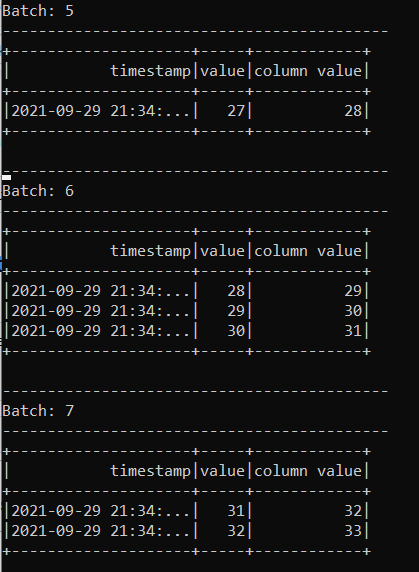

### Our Second streaming using rate source

### Create Streaming DataFrame

### Create Streaming DataFrame using socket source. Also, check if DataFrame isStreaming.


In [24]:
df = spark.readStream.format("socket") \
    .option("host", "localhost") \
    .option("port", 1234) \
    .load()

In [25]:
df.isStreaming

### Transformation: Word Count


Here we count words from a stream of data coming from this socket. Also, we check the schema of our streaming DataFrame.


In [26]:
words = df.select(explode(split(df.value,' ')).alias('word'))

In [27]:
words

In [28]:
counts = words.groupBy("word").count()

In [29]:
counts

In [30]:
counts.printSchema()

<div style="background:pink">
<li style="color:brown"> you shoud open firstly nmap from "C:\Program Files (x86)\Nmap" on pc</li>
<li style="color:brown">then open here cmd </li>
<li style="color:brown"> then put ncat -lvp 1234</li>
</div>

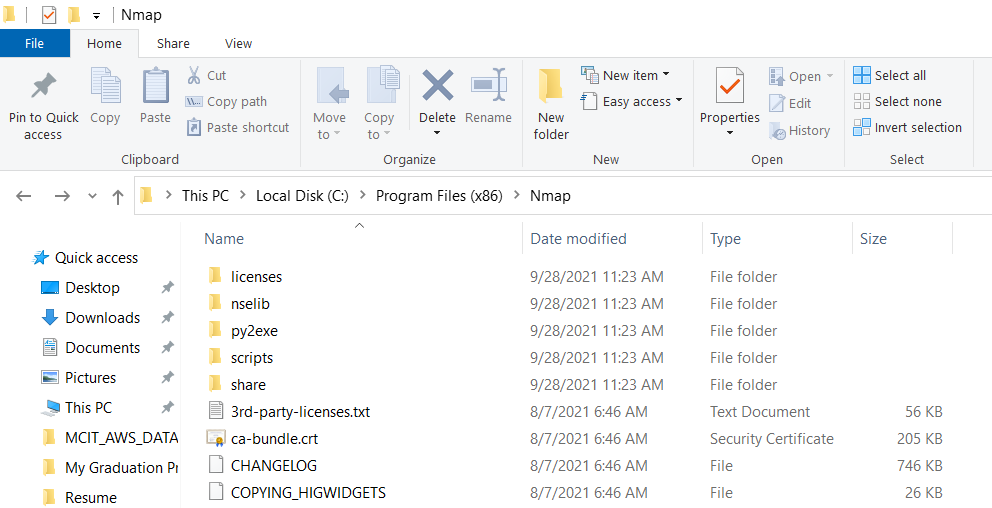

In [31]:
query = counts.writeStream.outputMode("complete") \
    .format("console") \
    .start()\
    .awaitTermination()

In [32]:
query.stop()

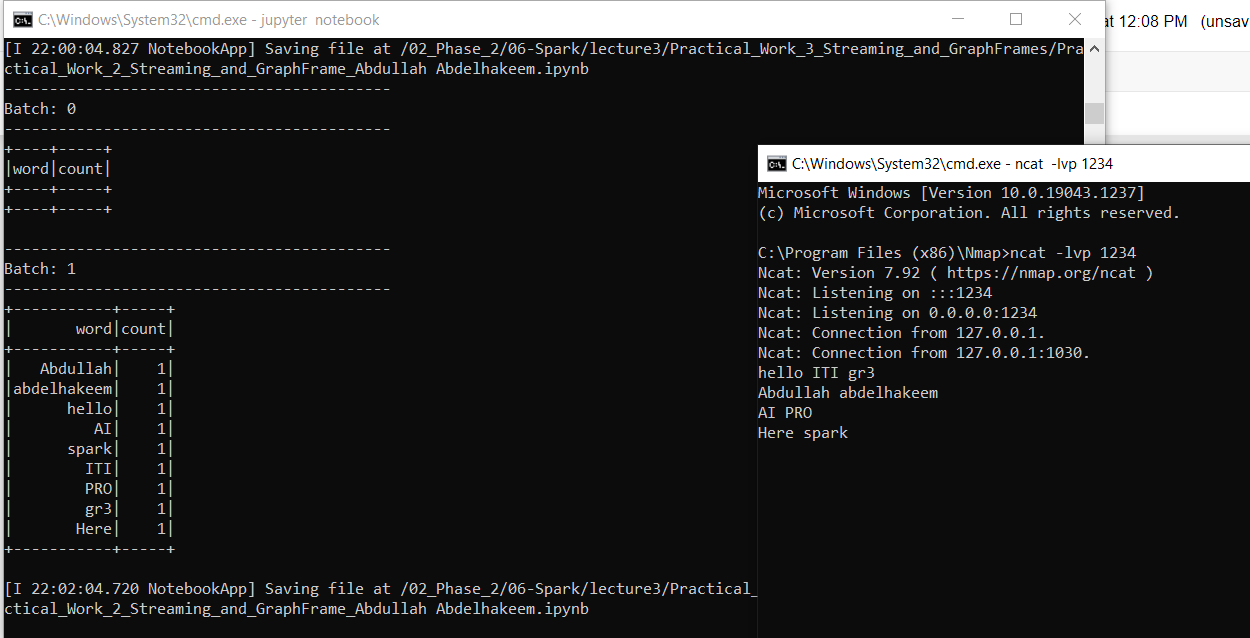

In [33]:
# ncat -lvp 1234 -->nmap # Windows not Linux

In [34]:
#Try "update"

### Input Sources — File

With file input source, our application will wait for available data in the specified directory. We will use some of the stock data available here. For example, Apple stock data present in this file: AAPL_2006–01–01_to_2018–01–01.csv. We will take the data for a few years like 2015, 2016, and 2017 and manually save it to a different file like AAPL_2015.csv, AAPL_2016.csvand AAPL_2017.csv respectively. Similarly, we will create the sample data for Google, Amazon, and Microsoft as well. We will keep all the CSV files locally under data/stocks folder. Also, create another folder data/stream which we will use to simulate the streaming data.

Schema Our data contains the fields Date,Open,High,Low,Close,Adj Close,Volume and we will extract Name from the filename using a custom function.
Here we define the schema and write a custom function to extract the stock ticker symbol.

In [35]:
# // Extract the Name of the stock from the file name.
from pyspark.sql.types import  *
schema = StructType([
  StructField("Date", StringType(), True),
  StructField("Open", DoubleType(), True),
  StructField("High", DoubleType(), True),
  StructField("Low", DoubleType(), True),
  StructField("Close", DoubleType(), True),
  StructField("Adj Close", DoubleType(), True),
  StructField("Volume", DoubleType(), True)
])

In [36]:
from  pyspark.sql.functions import input_file_name
import pyspark.sql.functions as f
import os

def getFileName(): 
    file_name = f.split(f.input_file_name(), '/')[10]
    return f.split(file_name,'_')[0]

#### Create Streaming DataFrame


Create a streaming DataFrame to read csv data from a specified directory "data/stream" and apply the above schema . We also specify the param maxFilesPerTrigger = 2 , which means our application will process a maximum of 2 CSV files in each batch. At the end, we create another column called Name using the function getFileName. That column contains stock ticker symbols like GOOGL, AMZN, AAPL etc.

In [37]:
inputDir = 'data'
df = spark.readStream.format("csv")\
    .schema(schema)\
    .option("maxFilesPerTrigger",2)\
    .option("truncate",False)\
    .load(inputDir)\
    .withColumn("Name",getFileName())

In [38]:
df

#### Transformation

Group the data based on stock Name, Year and find the maximum value of the HIGH column.

In [39]:
df_max = df.groupBy(col("Name"),year(col("Date"))).max("High")
df_max

Can you build same transformation by Sql? 

In [40]:
df.createOrReplaceTempView('df_view')

In [41]:
df_sql = spark.sql('SELECT MAX(High) AS Max FROM df_view GROUP BY Name, YEAR(Date)')
df_sql

#### Output
Print the contents of streaming DatFrame to console using update mode.




Work with any dataset from data file 

In [42]:
query = df_max.writeStream.outputMode("update") \
    .format("console") \
    .start().awaitTermination()

In [43]:
query.stop()

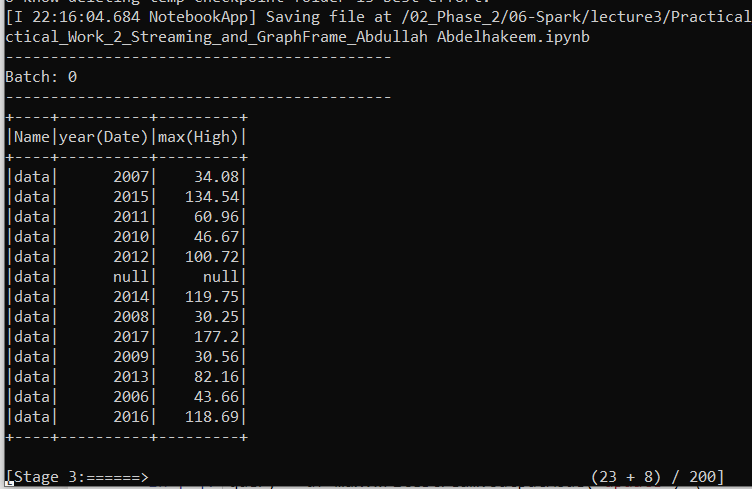

# Task 2

### Some aggregations transformation
Select "Name","Date", "Open", "High", "Low" and group by Name and Date and get the avg and use WithColumn to get current_timestamp 


In [44]:
from pyspark.sql.types import  *
schema = StructType([  
  StructField("Date", StringType(), True),
  StructField("Open", DoubleType(), True),
  StructField("High", DoubleType(), True),
  StructField("Low", DoubleType(), True),
  StructField("Close", DoubleType(), True),
  StructField("Volume", DoubleType(), True),
  StructField("Name", StringType(), True),
])

In [45]:
from pyspark.sql.functions import *
inputDir = 'data'
df = spark.readStream.format("csv")\
    .schema(schema)\
    .option("maxFilesPerTrigger",2)\
    .option("truncate",False)\
    .load(inputDir)

### Checkpoints

In [46]:
query = df.writeStream.outputMode("update") \
    .format("console") \
    .option("checkpointLocation","checkpoint")\
    .option("truncate",False)\
    .start().awaitTermination()

In [47]:
query.stop()

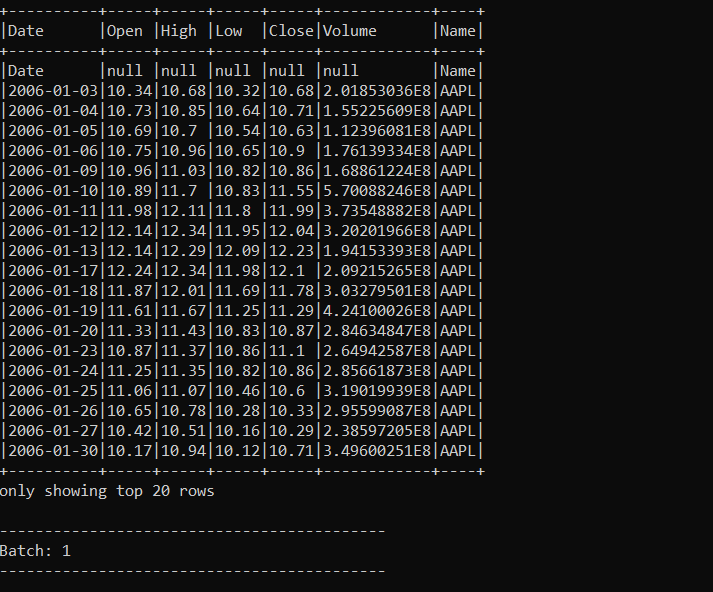

# Task 3

### One-time micro-batch
With a once trigger, our query will execute a single micro-batch. It will process all available data and then stop the application. This trigger is useful when you would like to spin-up a cluster periodically, 
Execute our streaming application with the once trigger.

In [48]:
query = df.writeStream.outputMode("append") \
    .format("console") \
    .trigger(once = True)\
    .option("truncate",False)\
    .start().awaitTermination()

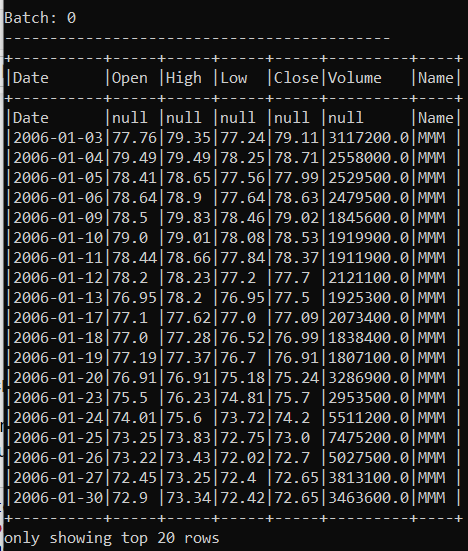

### Users can create GraphFrames from vertex and edge DataFrames.

* Vertex DataFrame: A vertex DataFrame should contain a special column named “id” which specifies unique IDs for each vertex in the graph.
* Edge DataFrame: An edge DataFrame should contain two special columns: “src” (source vertex ID of edge) and “dst” (destination vertex ID of edge).

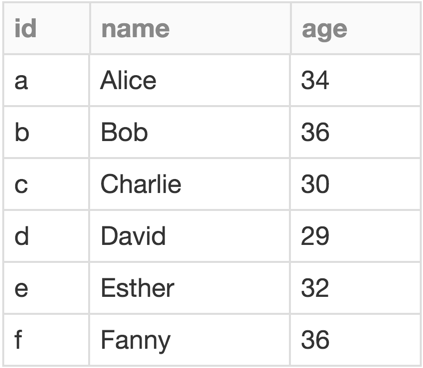

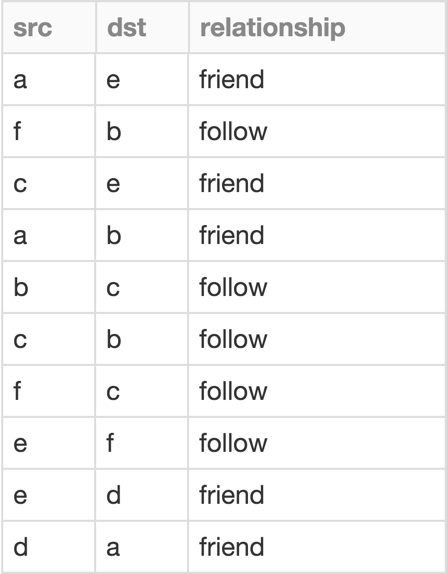

In [ ]:
# !pip install graphframes

In [60]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

In [61]:
from graphframes import *
spark = SparkSession.builder.appName('graphframes').getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

### Create a GraphFrame from vertex and edge DataFrames

In [62]:
# Create a Vertex DataFrame with unique ID column "id"
vert = spark.createDataFrame([('a','Alice',34),
                             ('b','Bob',36),
                             ('c','Charlie',30),
                             ('d','David',29),
                             ('e','Esther',32),
                             ('f','Fanny',36)],
                            ["id", "name", "age"])

In [63]:
Edg = spark.createDataFrame([('a','e','friend'),
                             ('f','b','follow'),
                             ('c','e','friend'),
                             ('a','b','friend'),
                             ('b','c','follow'),
                             ('c','b','follow'),
                             ('f','c','follow'),
                             ('e','f','follow'),
                             ('e','d','friend'),
                             ('d','a','friend')],
                           ["src", "dst", "relationship"])

In [64]:
localVertices = [(1,"A"), (2,"B"), (3, "C")]
localEdges = [(1,2,"love"), (2,1,"hate"), (2,3,"follow")]
v = sqlContext.createDataFrame(localVertices, ["id", "name"])
e = sqlContext.createDataFrame(localEdges, ["src", "dst", "action"])
g = GraphFrame(v, e)

In [65]:
g

GraphFrame(v:[id: bigint, name: string], e:[src: bigint, dst: bigint ... 1 more field])

### Take a look at the DataFrames

Get vertices, edges, and check the number of edges of each vertex

In [66]:
from graphframes import *
# Create a GraphFrame
gf = GraphFrame(vert,Edg)
gf.vertices

DataFrame[id: string, name: string, age: bigint]

In [67]:
gf.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  f|       1|
|  e|       2|
|  d|       1|
|  c|       2|
|  b|       3|
|  a|       1|
+---+--------+



In [68]:
vert.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
|  d|  David| 29|
|  e| Esther| 32|
|  f|  Fanny| 36|
+---+-------+---+



In [69]:
Edg.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  e|      friend|
|  f|  b|      follow|
|  c|  e|      friend|
|  a|  b|      friend|
|  b|  c|      follow|
|  c|  b|      follow|
|  f|  c|      follow|
|  e|  f|      follow|
|  e|  d|      friend|
|  d|  a|      friend|
+---+---+------------+



In [70]:
gf.degrees.show()

+---+------+
| id|degree|
+---+------+
|  f|     3|
|  e|     4|
|  d|     2|
|  c|     4|
|  b|     4|
|  a|     3|
+---+------+



## Create UDF Functions 
convert your graph by mapping a function over the edges DataFrame that deletes the row if src ≥ dst return "Delete" else "Keep"

In [ ]:
copy = Edg
from pyspark.sql.functions import udf
def to_undir(src, dst):
    if src >= dst:
        return 'Delete'
    else: 
        return 'Keep'
    
udf_data = udf(to_undir)    
copy.withColumn('undir', udf_data(copy.src, copy.dst)).filter('undir == "Keep"').drop('undir').show()

# Filtering and connected components

Check vertices when "age" greater than 30 and check edges "relationship" equal "friend" 

In [ ]:
gf.vertices.filter("age > 30").show()

In [ ]:
gf.edges.filter('relationship ="friend"').show()

GraphFrames requires you to set a directory where it can save checkpoints. Create such a folder in your working directory 

In [ ]:
spark.sparkContext.setCheckpointDir('graphframesCheckpt')

Then, the connected components can easily be computed with the connectedComponents-function.


In [ ]:
gf.connectedComponents().show()

## Motif finding


Search for pairs of vertices a,b connected by edge e and pairs of vertices b,c connected by edge e2. It will return a DataFrame of all such structures in the graph

In [ ]:
motifs = gf.find("(a)-[e]->(b);(b)-[e2]->(c)")
motifs.show()

In [ ]:
motifs = gf.find("(a)-[e]->(b);(b)-[e2]->(c)").filter('e.relationship = "friend" and e2.relationship = "friend"')
motifs.show()

In [ ]:
motifs.filter('a.id == "c" and c.id == "d"').show()

<h1 style="background-color:powderblue;color:#f5f7f9;text-align: center;"> Abdullah Abdelhakeem </h1>